#Old Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/MyCall_Data_September_2019_cleaning.csv")
df.head()


,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Indoor,4G,4,Satisfactory,12.691526,78.635086,Tamil Nadu
1,Airtel,Outdoor,4G,5,Satisfactory,25.594805,85.220971,Bihar
2,Airtel,Indoor,4G,5,Satisfactory,25.595471,85.221376,Bihar
3,Airtel,Indoor,4G,4,Satisfactory,28.640839,77.229266,NCT
4,Airtel,Indoor,4G,5,Satisfactory,28.640833,77.229232,NCT


In [ ]:
df.drop(['Latitude', 'Longitude'],axis = 'columns', inplace = True)
df

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,State Name
0,RJio,Indoor,4G,4,Satisfactory,Tamil Nadu
1,Airtel,Outdoor,4G,5,Satisfactory,Bihar
2,Airtel,Indoor,4G,5,Satisfactory,Bihar
3,Airtel,Indoor,4G,4,Satisfactory,NCT
4,Airtel,Indoor,4G,5,Satisfactory,NCT
...,...,...,...,...,...,...
16955,RJio,Outdoor,4G,5,Satisfactory,Maharashtra
16956,Vodafone,Outdoor,4G,2,Poor Voice Quality,Gujarat
16957,RJio,Indoor,4G,1,Call Dropped,Odisha
16958,BSNL,Travelling,2G,1,Call Dropped,Maharashtra


In [ ]:
df.rename( columns = {
    'In Out Travelling': 'InOut', 'Network Type': 'NetworkType', 'Call Drop Category': 'CallDropCategory', 'State Name': 'StateName'
}, inplace = True)

old = df.copy()

In [ ]:
obj = {
    'Operator': {'RJio':1 ,'Airtel':2,'Idea':3,'Other':4,'Vodafone':5,'BSNL':6,'MTNL':7}, 
    'InOut' : {'Indoor':1 ,'Outdoor':2,'Travelling':3}, 
    'NetworkType':  {'4G':1 ,'3G':2,'2G':3}, 
    'CallDropCategory': {'Satisfactory' : 1, 'Poor Voice Quality': 2, 'Call Dropped': 3},     
    'StateName' : {}
}

count = 1
for x in df['StateName'].unique(): 
  obj['StateName'][x] = count
  count += 1

In [ ]:
obj

{'CallDropCategory': {'Call Dropped': 3,
  'Poor Voice Quality': 2,
  'Satisfactory': 1},
 'InOut': {'Indoor': 1, 'Outdoor': 2, 'Travelling': 3},
 'NetworkType': {'2G': 3, '3G': 2, '4G': 1},
 'Operator': {'Airtel': 2,
  'BSNL': 6,
  'Idea': 3,
  'MTNL': 7,
  'Other': 4,
  'RJio': 1,
  'Vodafone': 5},
 'StateName': {'Andaman and Nicobar Islands': 25,
  'Andhra Pradesh': 14,
  'Assam': 21,
  'Bihar': 2,
  'Chandigarh': 6,
  'Chhattisgarh': 19,
  'Goa': 23,
  'Gujarat': 11,
  'Haryana': 16,
  'Himachal Pradesh': 24,
  'Jharkhand': 15,
  'Karnataka': 12,
  'Kerala': 13,
  'Lower Saxony': 20,
  'Madhya Pradesh': 9,
  'Maharashtra': 5,
  'NCT': 3,
  'Odisha': 22,
  'Punjab': 7,
  'Rajasthan': 17,
  'Tamil Nadu': 1,
  'Telangana': 10,
  'Uttar Pradesh': 4,
  'Uttarakhand': 18,
  'West Bengal': 8}}

In [ ]:
#Do not run this code two times, otherwise the map function will convert all nonmatched values to NaN

df['Operator'] = df['Operator'].map( {'RJio':1 ,'Airtel':2,'Idea':3,'Other':4,'Vodafone':5,'BSNL':6,'MTNL':7} )

df['InOut'] = df['InOut'].map( {'Indoor':1 ,'Outdoor':2,'Travelling':3} )

df['NetworkType'] = df['NetworkType'].map( {'4G':1 ,'3G':2,'2G':3} )

df['CallDropCategory'] = df['CallDropCategory'].map( {'Satisfactory' : 1, 'Poor Voice Quality': 2, 'Call Dropped': 3} )

df['StateName'] = df['StateName'].map(obj['StateName'])

df

,Operator,InOut,NetworkType,Rating,CallDropCategory,StateName
0,1,1,1,4,1,1
1,2,2,1,5,1,2
2,2,1,1,5,1,2
3,2,1,1,4,1,3
4,2,1,1,5,1,3
...,...,...,...,...,...,...
16955,1,2,1,5,1,5
16956,5,2,1,2,2,11
16957,1,1,1,1,3,22
16958,6,3,3,1,3,5


In [ ]:
# It will remove all the zero variance features
from sklearn.feature_selection import VarianceThreshold
X = df.drop( ['CallDropCategory'] , axis = 1)
y = df['CallDropCategory']
var_thres = VarianceThreshold(threshold = 0.1)
var_thres.fit(X)



VarianceThreshold(threshold=0.1)

In [ ]:
var_thres.get_support()
# the result shows that there are no zero variance features

array([ True,  True,  True,  True,  True])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape

(13568, 5)

In [ ]:
X_train.corr()

,Operator,InOut,NetworkType,Rating,StateName
Operator,1.000000,-0.039088,0.437858,0.082186,-0.049132
InOut,-0.039088,1.000000,-0.087404,-0.078405,-0.070067
NetworkType,0.437858,-0.087404,1.000000,0.010204,-0.017138
Rating,0.082186,-0.078405,0.010204,1.000000,0.078489
StateName,-0.049132,-0.070067,-0.017138,0.078489,1.000000


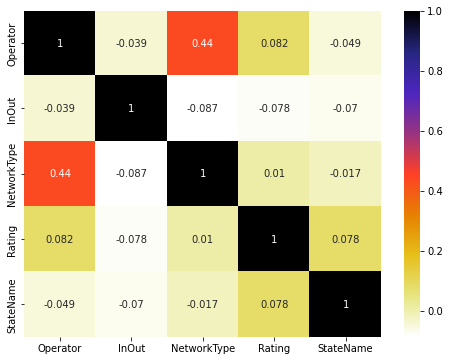

In [ ]:
import seaborn as sns
plt.figure(figsize = (8, 6))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

This heatmap shows that there is very less co releation between the independent variables. Means there are no duplicate varialbes in the independent variables. So there is no need to drop any variables. 

In [ ]:
X = df.columns.tolist()
X.remove('CallDropCategory')
X = df[X]
y = df['CallDropCategory']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

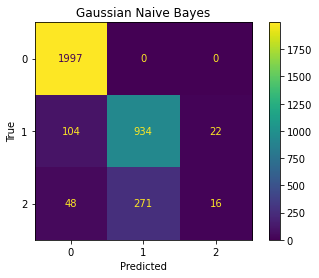

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussNb = GaussianNB()
gaussNb.fit(X_train.values, y_train)
 
# predicting test set results
y_pred = gaussNb.predict(X_test)
 
# making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)

cmd.plot()
#cmd.ax_.set_title('title')
cmd.ax_.set_title( 'Gaussian Naive Bayes')
cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [ ]:
print("\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print ( metrics.classification_report(y_test, y_pred)  ) 


Gaussian Naive Bayes model accuracy(in %): 86.88089622641509
              precision    recall  f1-score   support

           1       0.93      1.00      0.96      1997
           2       0.78      0.88      0.82      1060
           3       0.42      0.05      0.09       335

    accuracy                           0.87      3392
   macro avg       0.71      0.64      0.62      3392
weighted avg       0.83      0.87      0.83      3392



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

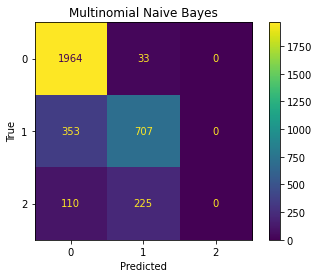

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MultiNb = MultinomialNB()
MultiNb.fit(X_train.values, y_train)

y_pred = MultiNb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)

cmd.plot()
#cmd.ax_.set_title('title')
cmd.ax_.set_title( 'Multinomial Naive Bayes')
cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [ ]:
print("\Multinomail Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print ( metrics.classification_report(y_test, y_pred)  ) 

\Multinomail Naive Bayes model accuracy(in %): 78.74410377358491
              precision    recall  f1-score   support

           1       0.81      0.98      0.89      1997
           2       0.73      0.67      0.70      1060
           3       0.00      0.00      0.00       335

    accuracy                           0.79      3392
   macro avg       0.51      0.55      0.53      3392
weighted avg       0.71      0.79      0.74      3392



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Implementing our gradio app

In [ ]:
! pip install gradio

     |████████████████████████████████| 871 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 32.2 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 2.0 MB 42.2 MB/s 
     |████████████████████████████████| 52 kB 718 kB/s 
     |████████████████████████████████| 210 kB 54.4 MB/s 
     |████████████████████████████████| 144 kB 55.2 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 271 kB 59.1 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 10.9 MB 40.9 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 3.6 MB 41.4 MB/s 
     |████████████████████████████████| 856 kB 32.9 MB/s 
     |████████████████████████████████| 61 kB 368 kB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=284e

In [ ]:
import gradio as gr

In [ ]:

old

,Operator,InOut,NetworkType,Rating,CallDropCategory,StateName
0,RJio,Indoor,4G,4,Satisfactory,Tamil Nadu
1,Airtel,Outdoor,4G,5,Satisfactory,Bihar
2,Airtel,Indoor,4G,5,Satisfactory,Bihar
3,Airtel,Indoor,4G,4,Satisfactory,NCT
4,Airtel,Indoor,4G,5,Satisfactory,NCT
...,...,...,...,...,...,...
16955,RJio,Outdoor,4G,5,Satisfactory,Maharashtra
16956,Vodafone,Outdoor,4G,2,Poor Voice Quality,Gujarat
16957,RJio,Indoor,4G,1,Call Dropped,Odisha
16958,BSNL,Travelling,2G,1,Call Dropped,Maharashtra


In [ ]:
temp = [[1, 1, 1, 1, 1]]
gaussNb.predict( temp )[0]  

2

In [ ]:
dict1 =  {1 : 'Satisfactory' , 2: 'Poor Voice Quality', 3: 'Call Dropped'}

def fun1(operator, inout, networktype, rating, statename): 
  temp = [[ obj['Operator'][operator], obj['InOut'][inout], obj['NetworkType'][networktype], rating, obj['StateName'][statename] ]]
  ans1 = gaussNb.predict( temp ) [0] 
  
  ans2 = MultiNb.predict( temp )[0]  
  return ( dict1[ans1], dict1[ans2] ) 
  

In [ ]:
temp = list ( df['Rating'].unique() ) 
interface = gr.Interface(
    fn = fun1,
    inputs = [ gr.inputs.Dropdown(list( obj['Operator'].keys() ) , label = 'Select an Operator' ),
              gr.inputs.Dropdown(list( obj['InOut'].keys() ) , label = 'Indoor, outdoor, or travelling' ),
              gr.inputs.Dropdown(list( obj['NetworkType'].keys() ) , label = 'Select your network type' ),
              gr.inputs.Dropdown( [1,2,3,4,5] , label = 'Select your rating' ),              
              gr.inputs.Dropdown(list( obj['StateName'].keys() ) , label = 'Select the State' ),              
              ], 
    outputs = [
               gr.outputs.Textbox(label = 'Gaussian NB'), 
               gr.outputs.Textbox(label = 'MultiNB')
    ], 
    theme = 'dark-huggingface')    

interface.launch(debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://55340.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7ff0a91cb1d0>,
 'http://127.0.0.1:7860/',
 'https://55340.gradio.app')

# Trying StreamLit

In [ ]:
!pip install streamlit

In [ ]:
!streamlit hello

2022-03-31 14:38:02.337 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.91.190.175:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...
  Stopping...
